### Importing Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [48]:
import numpy as np

### Loading Data from Directory

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './PlantVillage',
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

In [ ]:
class_names = dataset.class_names
class_names

In [ ]:
len(dataset)

In [ ]:
68*32

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

### Train/Test/Val split

In [ ]:
# 80% :: Train
# 10% :: Validation
# 10% :: Test

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
  
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

In [ ]:
len(val_ds)

In [ ]:
len(test_ds)

### Optimization

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Model Building

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.build(input_shape = input_shape)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 9s 173ms/step - loss: 0.9089 - accuracy: 0.4786 - val_loss: 0.8407 - val_accuracy: 0.5781
Epoch 2/50
54/54 [==============================] - 5s 92ms/step - loss: 0.7048 - accuracy: 0.6644 - val_loss: 0.6354 - val_accuracy: 0.7135
Epoch 3/50
54/54 [==============================] - 5s 93ms/step - loss: 0.4952 - accuracy: 0.7755 - val_loss: 0.4497 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 5s 102ms/step - loss: 0.3977 - accuracy: 0.8299 - val_loss: 0.2448 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 5s 93ms/step - loss: 0.2616 - accuracy: 0.9034 - val_loss: 0.3689 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 5s 93ms/step - loss: 0.2307 - accuracy: 0.9190 - val_loss: 0.2957 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 5s 92ms/step - loss: 0.1440 - accuracy: 0.9456 - val_loss: 0.1619 - val_accuracy: 0.9375
Epoch 8/50


In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 34ms/step - loss: 0.1112 - accuracy: 0.9609


### Visualizing History

In [30]:
scores

[0.11124459654092789, 0.9609375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
acc = history.history['accuracy']
val_acc = val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Accuracy')

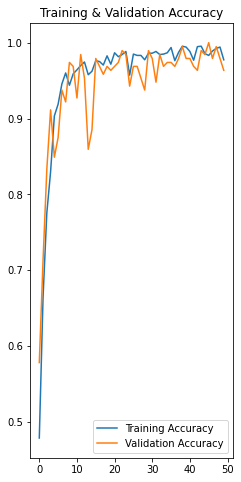

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training & Validation Accuracy")

Text(0.5, 1.0, 'Training & Validation Loss')

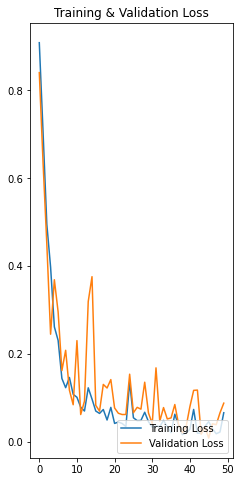

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc = 'lower right')
plt.title("Training & Validation Loss")

### Make Predictions/ Inference on sample images

first image to predict
first image actual label:  Potato___Late_blight
1/1 [==============================] - 0s 39ms/step
predicted label:  Potato___Late_blight


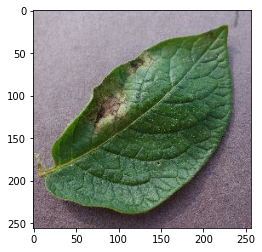

In [57]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]

  print("first image to predict")
  plt.imshow(first_image)
  print("first image actual label: ", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [63]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)  # Create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)

  return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


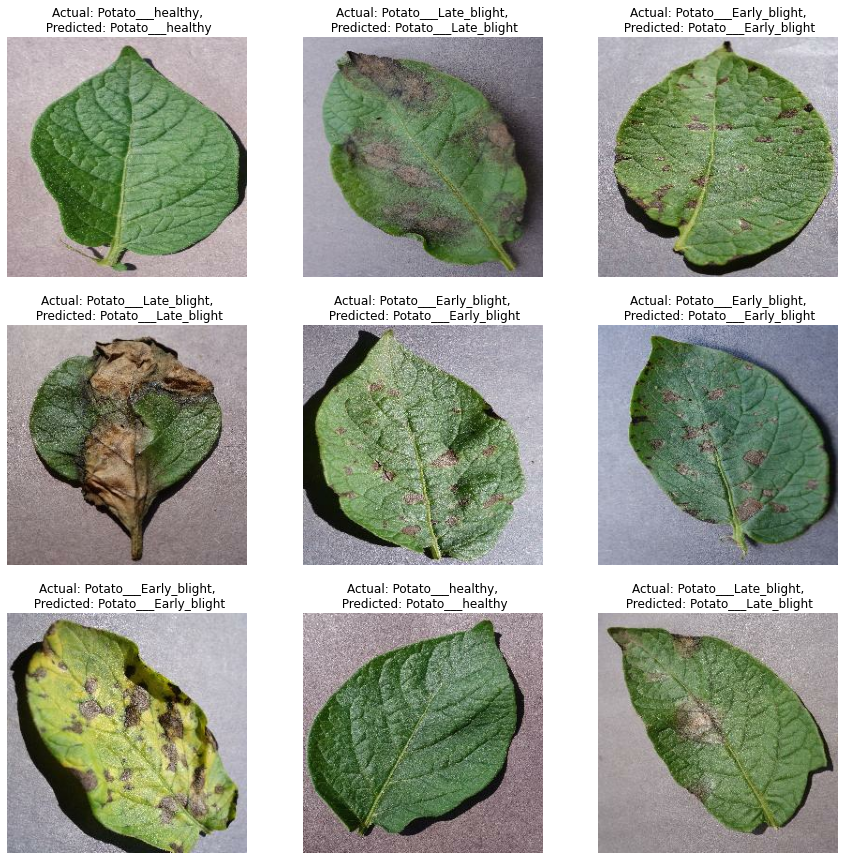

In [64]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")

    plt.axis("off")

In [66]:
model_version = 1
model.save(f"/content/models/{model_version}")